In [1]:
from qiskit import *

In [2]:
numq = 3 
circuit = QuantumCircuit(numq, numq)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])

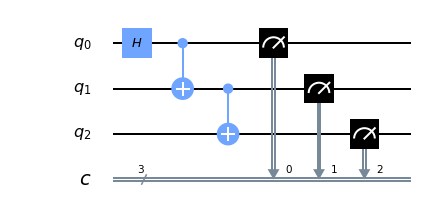

In [3]:
%matplotlib inline

circuit.draw(output='mpl')

In [9]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend = simulator, shots = 10000).result()

In [10]:
from qiskit.visualization import plot_histogram

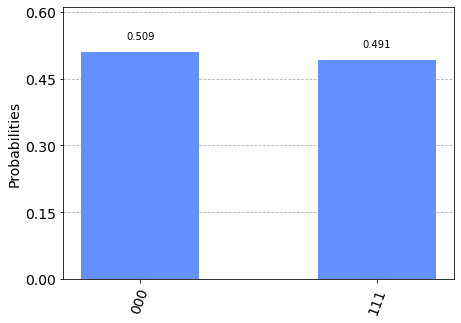

In [11]:
plot_histogram(sim_result.get_counts(circuit))

In [12]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
devices = provider.get_backend('ibmqx2')

In [14]:
job = execute(circuit, backend = devices, shots = 1000)
print(job.job_id())

from qiskit.tools.monitor import job_monitor
job_monitor(job)

5fec1a5a9b56240019a77f9b
Job Status: job has successfully run


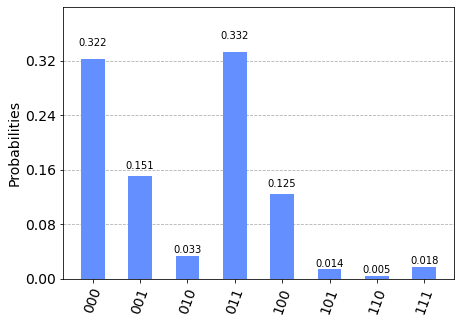

In [15]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

In [16]:
#mitigation tecnique
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [19]:
cal_circuits, stat_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel = 'measerrormitigationcal')

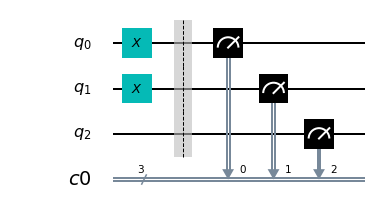

In [21]:
cal_circuits[3].draw(output = 'mpl')

In [22]:
len(cal_circuits)

8

In [23]:
cal_job = execute( cal_circuits,
                  backend = devices,
                  shots = 1024,
                  optimization_level = 0
                 )
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

5fec1d8d5c8bdb001a5de8ac
Job Status: job has successfully run


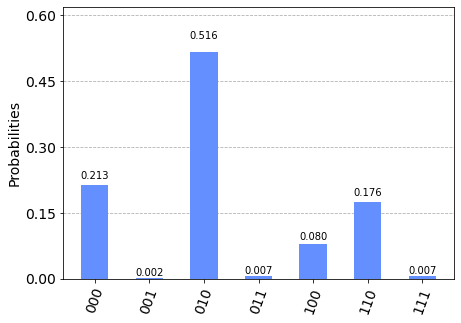

In [25]:
plot_histogram(
cal_results.get_counts(cal_circuits[2])
)

In [28]:
meas_fitter = CompleteMeasFitter(cal_results, stat_labels)

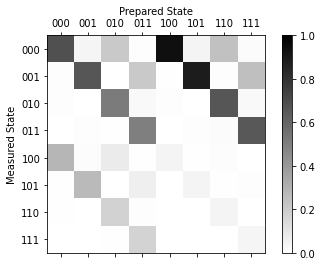

In [30]:
meas_fitter.plot_calibration()

meas_filter = meas_fitter.filter

In [31]:
meas_filter = meas_fitter.filter

In [32]:
mitigated_result = meas_filter.apply(device_result)

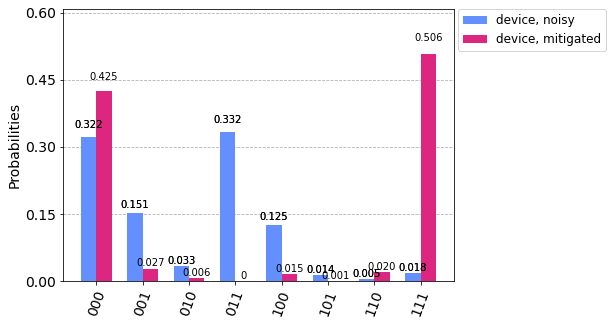

In [34]:
device_counts = device_result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], legend = ['device, noisy', 'device, mitigated'])

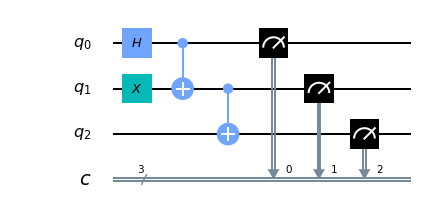

In [36]:
circuit2 = QuantumCircuit(3,3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2], [0,1,2])
circuit2.draw(output = 'mpl')

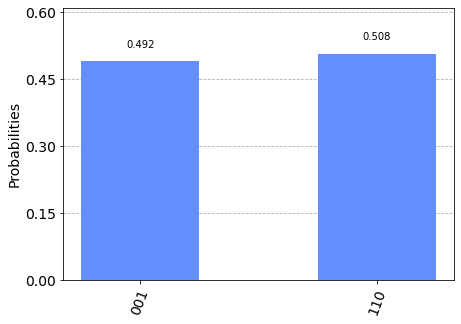

In [39]:
plot_histogram(
    execute(circuit2,backend = simulator, shots = 1024).result().get_counts(circuit2)
)

In [41]:
device_counts_2 = execute(circuit2, backend = devices, shots = 1024).result().get_counts(circuit2)

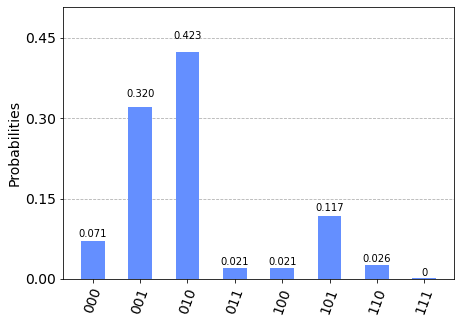

In [42]:
plot_histogram(device_counts_2)

In [44]:
device_mitigated_counts_2 = meas_filter.apply(device_counts_2)

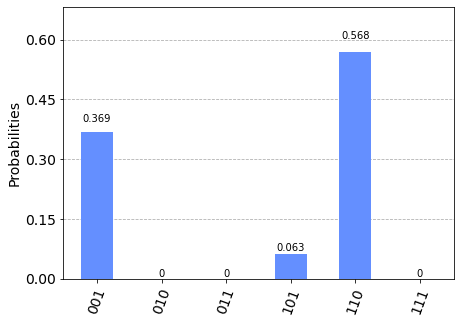

In [45]:
plot_histogram(device_mitigated_counts_2)